In [1]:
from comet_ml import Experiment

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import math
import random
from collections import OrderedDict
from tqdm import tqdm

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from vecbool_data_gen import *
from train_vecbool_model import *
from test_vecbool import *
from heatmap_experiment import *

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/clrkwng/vecbool-report/71d8f9174c834fd99c907ac0729378a1



In [4]:
%load_ext autoreload
%autoreload 2

## Code Testing

In [5]:
from itertools import islice
# This is for the case of [1,0,0,1,1]

In [7]:
x_vals = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
y_vals = [-3, 3, 3, 1, 3, -7, 1, -7, 1, 2, -3, 1, -3, -3, -3, 3, -3, 3, -3, -3, -3, -7, -8, -3, 3, -7, 3, 3, 3, 3, -3, 1, -3, 3, -7, 1, 1, 3, 1, 1, 3, 2, 3, -3, -3, -3, 4, -3, 1, -3, 2, 1, -3, -3, -3, 3, -7, -3, 1, -3, 1, 2, 1, 1, 1, -2, 3, -3, -3, 1, 3, 1, 1, -7, -3, -3, -7, 3, -3, 1, 3, 3, 1, 1, 3, -3, 3, 3, 0, 2, 3, -3, 3, 3, 1, 3, 1, -3, -7, 3, -4, 2, 2, 0, 2, 2, 0, 2, 0, 1, -4, 0, -4, -4, -4, 2, -4, 2, -4, -4, -4, 2, 1, -4, 2, 2, 2, 2, 2, 2, -4, 0, -4, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, -4, -4, -4, 3, -4, 0, -4, 1, 0, -4, -4, -4, 2, 2, -4, 0, -4, 0, 1, 0, 0, 0, -3, 2, -4, -4, 0, 2, 0, 0, 2, -4, -4, 2, 2, -4, 0, 2, 2, 0, 0, 2, -4, 2, 2, 0, 1, 2, -4, 2, 2, 0, 2, 0, -4, 2, 2, -1, 5, 5, -7, 5, -5, 3, -5, -7, 4, -1, -7, -1, -1, -1, 5, -1, 5, -1, -1, -1, -5, -6, -1, 5, -5, 5, 5, 5, 5, -1, -7, -1, 5, -5, 3, 3, 5, -7, -7, 5, 4, 5, -1, -1, -1, 6, -1, 3, -1, -6, -7, -1, -1, -1, 5, -5, -1, -7, -1, -7, 4, -7, -7, 3, 0, 5, -1, -1, -7, 5, -7, -7, -5, -1, -1, -5, -5, -1, 3, 5, 5, -7, 3, 5, 0, 5, 5, -7, -6, 5, -1, 5, 5, 3, 5, -7, -1, -5, 5, 0, 6, 6, -6, 6, -4, 4, -4, -6, 5, 0, -6, 0, 0, 0, 6, 0, 6, 0, 0, 0, -4, -5, 0, 6, -4, 6, 6, 6, 6, 0, -6, 0, 6, -4, -6, -6, 6, -6, -6, 6, 5, -4, 0, 0, 0, -3, 0, 4, 0, -5, -6, 0, 0, 0, 6, -4, 0, -6, 0, -6, 5, -6, -6, -6, 1, 6, 0, 0, -6, 6, -6, -6, -4, 0, 0, -4, -4, 0, -6, 6, 6, -6, -6, 6, 0, 6, 6, -6, -5, 6, 0, 6, -4, -6, -4, -6, 0, -4, 6, 3, -1, -1, -3, -1, -1, -3, -1, -3, -2, 3, -3, 3, 3, 3, -1, 3, -1, 3, 3, 3, -1, -2, 3, -1, -1, -1, -1, -1, -1, -7, -3, 3, -1, -1, -3, -3, -1, -3, -3, -1, -2, -1, 3, 3, 3, 0, 3, 7, 3, -2, -3, 3, 3, 3, -1, -1, 3, -3, 3, -3, -2, -3, -3, -3, 4, -1, 3, 3, -3, -1, -3, -3, -1, 3, 3, -1, -1, 3, -3, -1, -1, -3, -3, -1, 4, -1, -1, -3, -2, -1, 3, -1, -1, -3, -1, -3, 3, -1, -1, 4, 0, 0, -2, 0, 0, -2, 0, -2, -1, 4, -2, 4, 4, -6, 0, 4, 0, 4, 4, 4, 0, -1, 4, 0, 0, 0, 0, 0, 0, -6, -2, 4, 0, 0, -2, -2, 0, -2, -2, 0, -1, 0, 4, 4, 4, 1, 4, -2, 4, -1, -2, -6, 4, -6, 0, 0, -6, -2, -6, -2, -1, -2, -2, -2, -5, 0, 4, -6, -2, 0, -2, -2, 0, -6, 4, 0, 0, 4, -2, 0, 0, -2, -2, 0, -5, 0, 0, -2, -1, 0, 4, 0, 0, -2, 0, -2, -6, 0, 0]
get_heatmap_arr(x_vals, y_vals)

array([[ 0,  1,  9,  0,  0,  0, 30,  1,  0,  1, 24,  5, 28,  1,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  1,  0,  0, 25,  6, 37,  1,  0,  0,  0,
         0,  0,  0],
       [ 0,  0, 17,  3, 10,  0,  0,  0, 29,  2,  0,  0,  8,  3, 27,  1,
         0,  0,  0],
       [ 0,  0,  0, 23,  3, 13,  1,  0,  0, 30,  1,  0,  0,  2,  3, 24,
         0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 24,  6, 37,  1,  0,  0, 28,  2,  0,  0,
         1,  0,  0],
       [ 0,  0,  0,  9,  2,  0,  0, 25,  6, 37,  1,  0,  0, 20,  0,  0,
         0,  0,  0]])

In [41]:
arr = iter(y_vals)
output = [list(islice(arr, elem)) for elem in [len(x_vals) // 6] * 6]
for lst in output:
    lst = np.asarray(lst)
    print(np.unique(lst, return_counts=True))

(array([ 1,  2,  6,  7,  9, 10, 11, 12, 13]), array([ 1,  9, 30,  1,  1, 24,  5, 28,  1]))
(array([ 5,  6,  9, 10, 11, 12]), array([30,  1, 25,  6, 37,  1]))
(array([ 2,  3,  4,  8,  9, 12, 13, 14, 15]), array([17,  3, 10, 29,  2,  8,  3, 27,  1]))
(array([ 3,  4,  5,  6,  9, 10, 13, 14, 15]), array([23,  3, 13,  1, 30,  1,  2,  3, 24]))
(array([ 2,  6,  7,  8,  9, 12, 13, 16]), array([ 1, 24,  6, 37,  1, 28,  2,  1]))
(array([ 3,  4,  7,  8,  9, 10, 13]), array([ 9,  2, 25,  6, 37,  1, 20]))


In [36]:
heatmap, xedges, yedges = np.histogram2d(x_vals, y_vals, bins=[6,19])
heatmap

array([[ 1.,  9.,  0.,  0.,  0.,  0., 30.,  1.,  0.,  0.,  1., 24.,  5.,
        28.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 30.,  1.,  0.,  0.,  0., 25.,  6., 37.,
         1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 17.,  3., 10.,  0.,  0.,  0.,  0., 29.,  0.,  2.,  0.,  0.,
         8.,  0.,  3., 27.,  1.,  0.],
       [ 0.,  0., 23.,  3.,  0., 13.,  1.,  0.,  0.,  0., 30.,  1.,  0.,
         0.,  0.,  2.,  3., 24.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0., 24.,  6., 37.,  0.,  1.,  0.,  0.,
        28.,  0.,  2.,  0.,  0.,  1.],
       [ 0.,  0.,  9.,  2.,  0.,  0.,  0., 25.,  6.,  0., 37.,  1.,  0.,
         0.,  0., 20.,  0.,  0.,  0.]])

In [44]:
heatmap = []
for lst in output:
    lst = np.asarray(lst)
    tmp_lst = [0] * 19
    unique_cts = np.unique(lst, return_counts=True)
    for val, count in zip(unique_cts[0], unique_cts[1]):
        tmp_lst[val] = count
    heatmap.append(tmp_lst)
heatmap = np.asarray(heatmap)
heatmap

array([[ 0,  1,  9,  0,  0,  0, 30,  1,  0,  1, 24,  5, 28,  1,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  1,  0,  0, 25,  6, 37,  1,  0,  0,  0,
         0,  0,  0],
       [ 0,  0, 17,  3, 10,  0,  0,  0, 29,  2,  0,  0,  8,  3, 27,  1,
         0,  0,  0],
       [ 0,  0,  0, 23,  3, 13,  1,  0,  0, 30,  1,  0,  0,  2,  3, 24,
         0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 24,  6, 37,  1,  0,  0, 28,  2,  0,  0,
         1,  0,  0],
       [ 0,  0,  0,  9,  2,  0,  0, 25,  6, 37,  1,  0,  0, 20,  0,  0,
         0,  0,  0]])

In [23]:
heatmap = np.asarray([[ 1,  9,  0,  0,  0,  0, 30,  1,  0,  0,  1, 24,  5, 28,  0,  1,  0,  0,
   0],
 [ 0,  0,  0,  0,  0, 30,  1,  0,  0,  0, 25,  6, 37,  1,  0,  0,  0,  0,
   0],
 [ 0, 17,  3, 10,  0,  0,  0,  0, 29,  0,  2,  0,  0,  8,  0,  3, 27,  1,
   0],
 [ 0,  0, 23,  3,  0, 13,  1,  0,  0,  0, 30,  1,  0,  0,  0,  2,  3, 24,
   0],
 [ 0,  1,  0,  0,  0,  0, 24,  6, 37,  0,  1,  0,  0, 28,  0,  2,  0,  0,
   1],
 [ 0,  0,  9,  2,  0,  0,  0, 25,  6,  0, 37,  1,  0,  0,  0, 20,  0,  0,
   0]])

print(heatmap)

[[ 1  9  0  0  0  0 30  1  0  0  1 24  5 28  0  1  0  0  0]
 [ 0  0  0  0  0 30  1  0  0  0 25  6 37  1  0  0  0  0  0]
 [ 0 17  3 10  0  0  0  0 29  0  2  0  0  8  0  3 27  1  0]
 [ 0  0 23  3  0 13  1  0  0  0 30  1  0  0  0  2  3 24  0]
 [ 0  1  0  0  0  0 24  6 37  0  1  0  0 28  0  2  0  0  1]
 [ 0  0  9  2  0  0  0 25  6  0 37  1  0  0  0 20  0  0  0]]


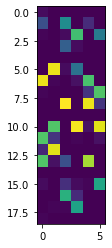

In [11]:
plt.imshow(heatmap)

In [51]:
x = torch.tensor([1,2]).float().cuda()
p = tensor_to_numpy(model(x))
print(p)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/clrkwng/vecbool-report/1bdfbd1abdd44133b035d8a66bbf8d73
COMET INFO:   Parameters:
COMET INFO:     balanceGTLabelFlag       : True
COMET INFO:     batch_flag               : True
COMET INFO:     batch_size               : 256
COMET INFO:     boolvec_dim              : 5
COMET INFO:     cont_range               : [0, 5]
COMET INFO:     convertBooleanFlag       : True
COMET INFO:     emb_dims                 : [10, 20]
COMET INFO:     hidden_drop_p            : 0.1
COMET INFO:     lin_layer_sizes          : [128, 512, 128, 32]
COMET INFO:     lr                       : 0.001
COMET INFO:     neighbor_bools           : [[1, 1, 0, 1, 1], [1, 0, 0, 0, 0], [1, 0, 1, 1, 0], [0, 0, 0, 1, 1], [0, 1, 0, 0, 0], [1, 1, 1, 0, 0], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0]

[0.08264152 0.07786389 0.11805081 0.09241555 0.16691609 0.06978457
 0.12702969 0.08346353 0.08346368 0.09837068]


In [48]:
X, preds = arbitrary_g(X_01)
preds[4]

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], device='cuda:0')

In [32]:
list(range(5))

[0, 1, 2, 3, 4]

In [31]:
cont_data, labels = get_cont_data(1000)
bool_vec = [1,0,0,1,1]
preds = eval_model(cont_data, bool_vec, model)

tensor([[6],
        [3],
        [7],
        [9],
        [6],
        [7],
        [6],
        [7],
        [6],
        [3],
        [7],
        [6],
        [7],
        [7],
        [9],
        [7],
        [7],
        [6],
        [7],
        [6],
        [6],
        [7],
        [3],
        [8],
        [7],
        [6],
        [7],
        [6],
        [6],
        [6],
        [7],
        [7],
        [7],
        [7],
        [6],
        [6],
        [8],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [8],
        [7],
        [7],
        [7],
        [7],
        [6],
        [7],
        [6],
        [7],
        [7],
        [7],
        [7],
        [9],
        [6],
        [7],
        [7],
        [7],
        [0],
        [7],
        [7],
        [6],
        [7],
        [7],
        [7],
        [6],
        [6],
        [7],
        [7],
        [7],
        [7],
        [7],
        [6],
        [3],

In [9]:
train_data, valid_data = get_train_valid_data(8000, 1000)

y_train distribution: (array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([145, 138, 125, 168, 146, 145, 140, 140, 148, 145]))

y_valid distribution: (array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]), array([26, 20, 19, 21, 25, 23, 14, 22, 19, 21]))



In [8]:
# Making sure that the training data fed into the model is right.
trainloader = torch.utils.data.DataLoader(dataset=train_data, shuffle=True, batch_size=hyper_params["batch_size"])
for inputs, labels in trainloader:
    inputs = tensor_to_numpy(inputs)
    inputs_orig = unstandardize_data(inputs)
    _, true_labels = true_g(inputs_orig[:, :2])
    rotated_labels = true_f(true_labels, inputs_orig)
    
    assert np.array_equal(tensor_to_numpy(labels), rotated_labels), "Not equal."

AssertionError: Classes and rot_amts need to be same length.

In [197]:
# Making sure that validation data looks right.
inputs, labels = valid_data
inputs_orig = unstandardize_data(tensor_to_numpy(inputs))
_, true_labels = true_g(inputs_orig[:, :2])
rotated_labels = true_f(true_labels, inputs_orig)
assert np.array_equal(tensor_to_numpy(labels), rotated_labels), "Not equal."

In [6]:
# Making sure testing data looks right.
X_test, y_test = get_test_splitB(5000, hyper_params["test_dist"])
X_test_orig = unstandardize_data(X_test)
_, true_labels = true_g(X_test_orig[:, :2])
rotated_labels = true_f(true_labels, X_test_orig)
assert np.array_equal(y_test, rotated_labels), "Not equal."

AssertionError: Not equal.

In [5]:
model = WangNet(boolvec_dim=hyper_params["boolvec_dim"], emb_dims=hyper_params["emb_dims"], num_cont=hyper_params["num_cont"], \
lin_layer_sizes=hyper_params["lin_layer_sizes"], output_size=hyper_params["num_classes"], hidden_drop_p=hyper_params["hidden_drop_p"], \
batch_flag=hyper_params["batch_flag"]).cuda()

save_path = "../saved_model_params/vecbool_model_state_dict.pt"
model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [22]:

X_train_cont, X_train_cat, y_train = get_testing_data(1000, get_test_splitA, 0)
model(X_train_cont, X_train_cat)

RuntimeError: CUDA error: device-side assert triggered

## Data Exploration

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/clrkwng/vecbool/93225dadc5024977a5896c5bc71d4b70
COMET INFO:   Parameters:
COMET INFO:     balanceGTLabelFlag       : True
COMET INFO:     batch_flag               : True
COMET INFO:     batch_size               : 256
COMET INFO:     boolvec_dim              : 2
COMET INFO:     cont_range               : [0, 5]
COMET INFO:     convertBooleanFlag       : True
COMET INFO:     emb_dims                 : [4, 8]
COMET INFO:     hidden_drop_p            : 0.1
COMET INFO:     lin_layer_sizes          : [128, 512, 1024, 800, 512, 128, 32, 20]
COMET INFO:     lr                       : 0.001
COMET INFO:     neighbor_bools           : [[1, 0]]
COMET INFO:     num_classes              : 10
COMET INFO:     num_cont                 : 2
COMET INFO:     num_epoc

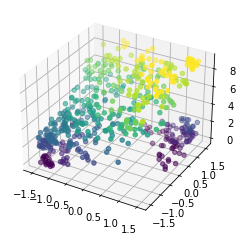

In [184]:
X_train, y_train = get_train_data(3000)

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).long()

train_data = []
for i in range(len(X_train)):
#     train_data.append([X_train[i], X_train_true_labels[i]])
    train_data.append([X_train[i], y_train[i]])
        
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], y_train, c=y_train)

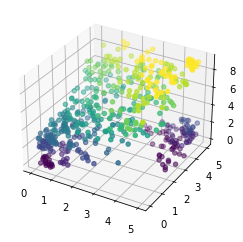

In [185]:
# Plotting the training data, unstandardized
X_train_orig = unstandardize_data(X_train)

ax = plt.axes(projection='3d')
ax.scatter3D(X_train_orig[:, 0], X_train_orig[:, 1], y_train, c=y_train)

In [186]:
boolvec_dim

2

In [72]:
print(rep_bools)

[(1, 0, 1, 0, 0), (0, 0, 1, 0, 0), (0, 1, 1, 0, 0), (0, 0, 0, 0, 0), (0, 0, 1, 1, 0), (0, 1, 1, 0, 1)]


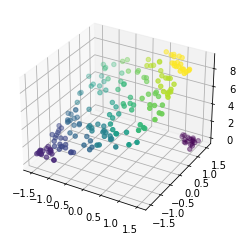

In [8]:
X_test, y_test = get_test_splitB(1000, 1)

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).long()
        
ax = plt.axes(projection='3d')
ax.scatter3D(X_test[:, 0], X_test[:, 1], y_test, c=y_test)

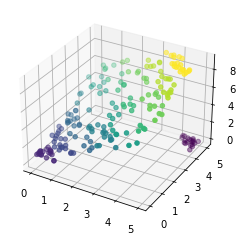

In [10]:
# Plotting the training data, unstandardized
X_train_orig = unstandardize_data(X_test)

ax = plt.axes(projection='3d')
ax.scatter3D(X_train_orig[:, 0], X_train_orig[:, 1], y_test, c=y_test)

In [19]:
len(np.unique(X_test[:, 2:], axis=0))

8

In [14]:
np.unique(X_test[:, 2:], axis=0)

array([[0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 1.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 1., 1.],
       [0., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 1.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 1.],
       [1., 0., 1., 1., 1., 0.],
       [1., 0., 1., 1., 1., 1.],
       [1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 0., 1.]], dtype=float32)

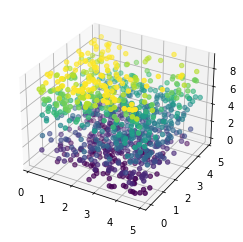

In [15]:
# Plotting the testing data, unstandardized
X_test_orig = unstandardize_data(X_test, cache["X_testB_mean"], cache["X_testB_std"])

ax = plt.axes(projection='3d')
ax.scatter3D(X_test_orig[:, 0], X_test_orig[:, 1], y_test, c=y_test)

In [13]:
print(cache)

{'X_train_mean': array([2.47794626, 2.52247822]), 'X_train_std': array([1.44276969, 1.44830836]), 'X_testB_mean': array([2.45533037, 2.44018852]), 'X_testB_std': array([1.45195337, 1.43532475])}


## Helper Methods

In [99]:
def get_num_correct(preds, labels):
    pred = preds.max(1, keepdim=True)[1]
    correct = pred.eq(labels.view_as(pred)).sum().item()
    return correct

## Training Model

In [107]:
emb_dims = [2*boolvec_dim, 8*boolvec_dim]
# emb_dims = [0, 0]
batch_size = 256
trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
num_batches = math.ceil(1.0 * len(train_data) / batch_size)

In [108]:
model = WangNet(emb_dims=emb_dims, no_of_cont=2, lin_layer_sizes=[64, 256, 512, 320, 256, 128, 64, 32, 20], \
               output_size=num_classes, hidden_drop_p=0, batch_flag=False)

n_epochs = 100000
loss_values = []
acc_values = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

t = tqdm(range(1, n_epochs+1), miniters=100)
for epoch in t:
    total_loss = 0
    correct = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        cont_x = inputs[:, :2].float()
        cat_x = inputs[:, 2].long()
        
        optimizer.zero_grad()
        
        preds = model(cont_x, cat_x)
        
        loss = criterion(preds, labels)
        total_loss += loss.item()
        correct += get_num_correct(preds, labels)
        
        loss.backward()
        optimizer.step()
    epoch_loss = total_loss/num_batches
    acc = correct/len(train_data)
    t.set_description(f"-----Epoch: {epoch}/{n_epochs}, Loss: {total_loss/num_batches}, Accuracy: {acc}-----")
    loss_values.append(epoch_loss)
    acc_values.append(acc)

-----Epoch: 13092/100000, Loss: 0.05877398264904817, Accuracy: 0.977-----:  13%|█▎        | 13092/100000 [1:08:43<6:35:35,  3.66it/s]              IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

-----Epoch: 15766/100000, Loss: 0.12641014407078424, Accuracy: 0.954-----:  16%|█▌        | 15765/100000 [1:21:58<6:17:19,  3.72it/s]              IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

-----Epoch: 19362/100000, Loss: 0.1056209784001112, Accu

KeyboardInterrupt: 

Text(0, 0.5, 'Training loss')

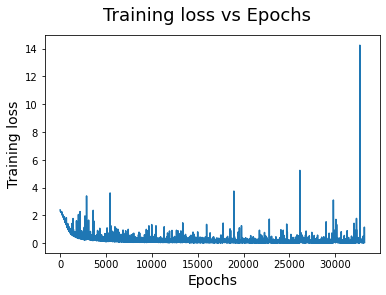

In [110]:
plt.plot(np.array(np.arange(0, 33187)), loss_values)
plt.suptitle('Training loss vs Epochs', fontsize=18)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Training loss', fontsize=14)

Text(0, 0.5, 'Training accuracy')

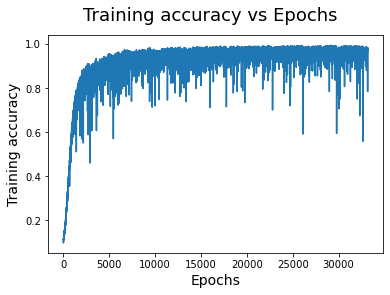

In [112]:
plt.plot(np.array(np.arange(0, 33187)), acc_values)
plt.suptitle('Training accuracy vs Epochs', fontsize=18)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Training accuracy', fontsize=14)

## Model Testing